In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
#print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
##app_train.head()
amt_income = app_train['AMT_INCOME_TOTAL']


In [3]:
print(amt_income.dtype)

float64


Numbers of remain columns 65


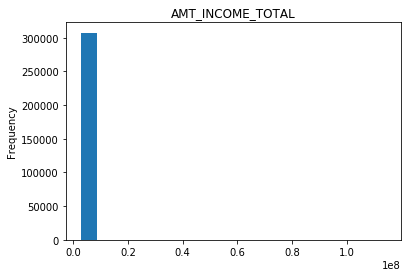

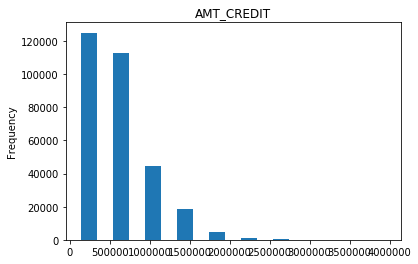

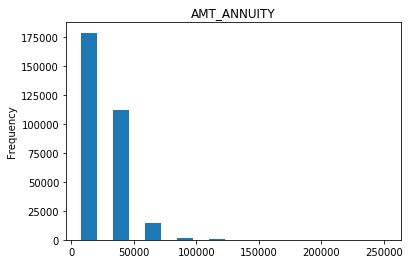

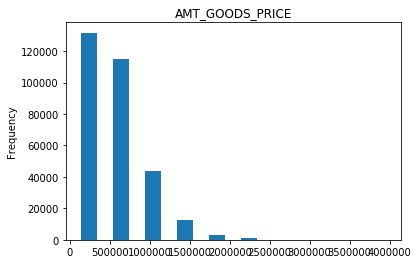

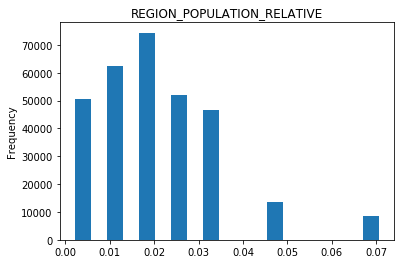

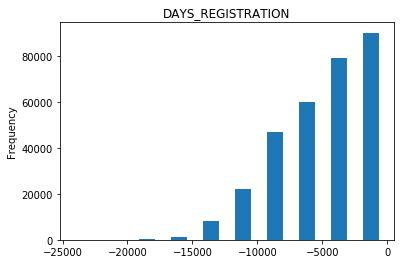

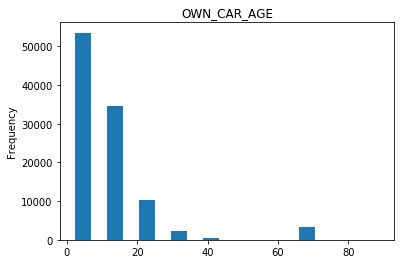

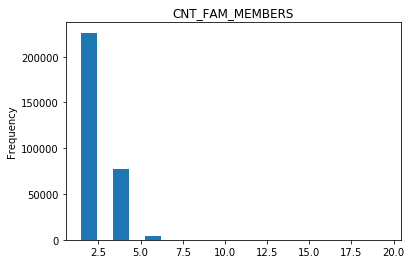

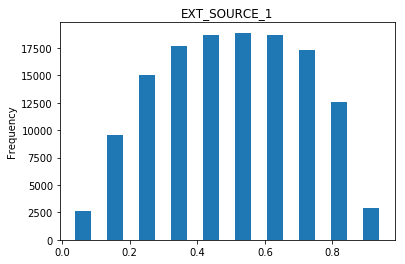

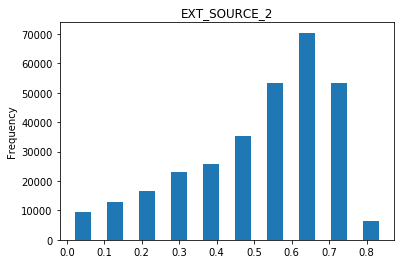

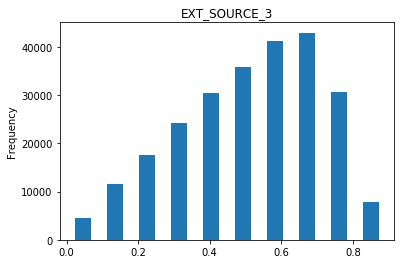

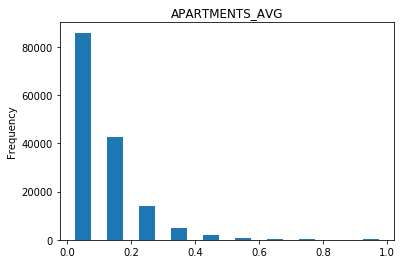

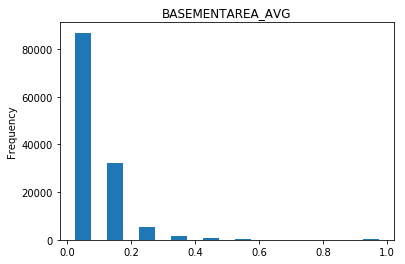

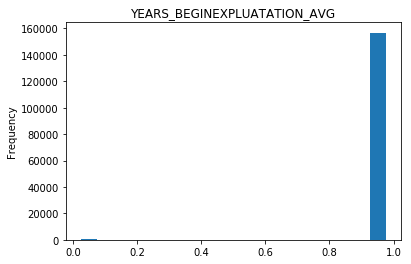

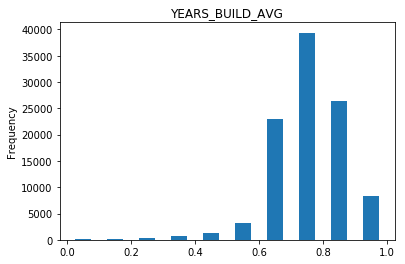

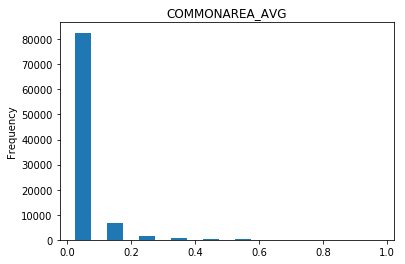

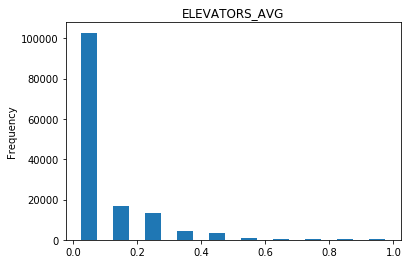

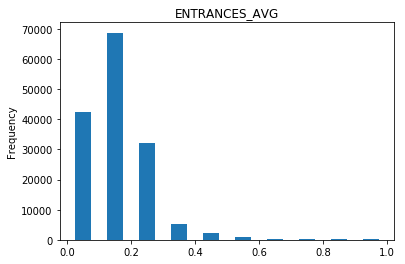

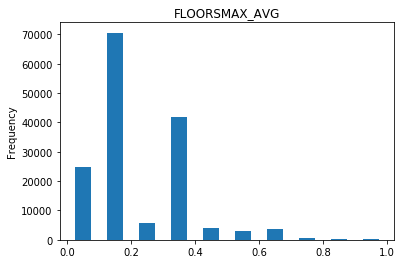

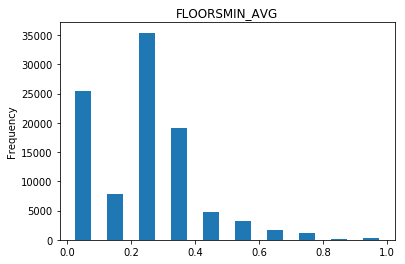

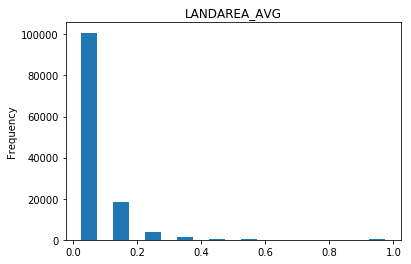

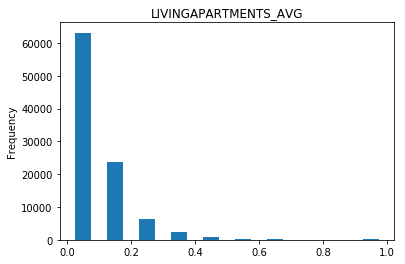

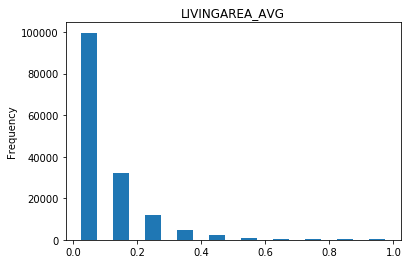

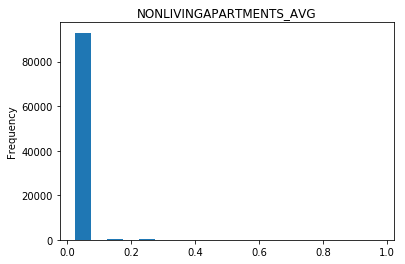

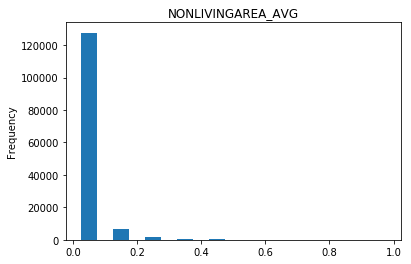

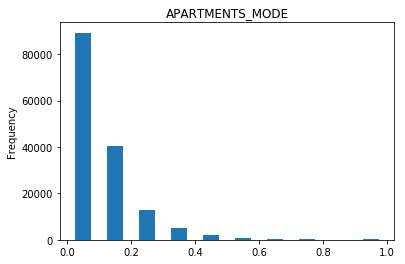

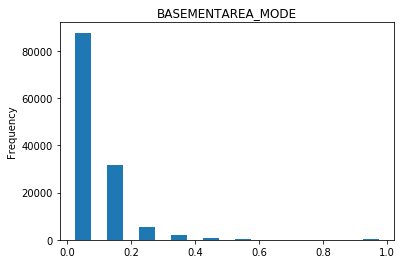

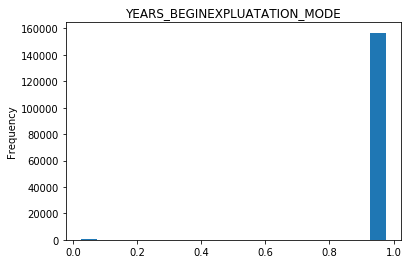

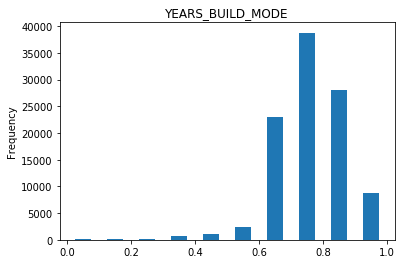

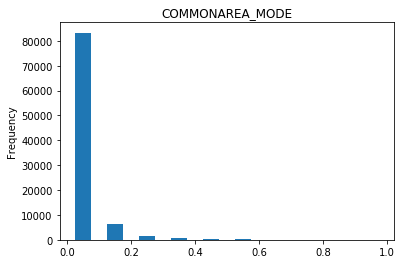

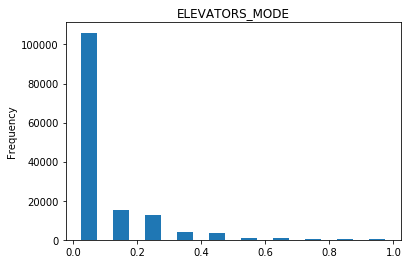

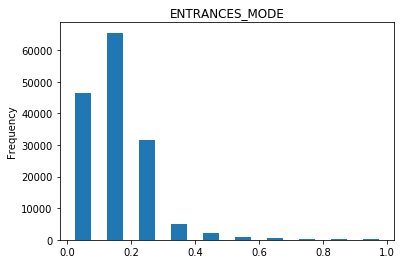

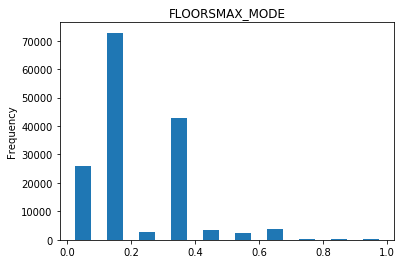

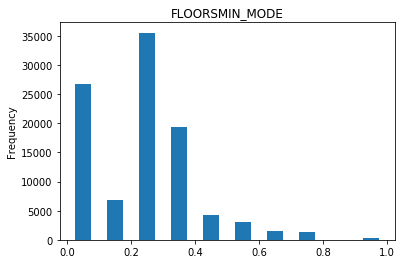

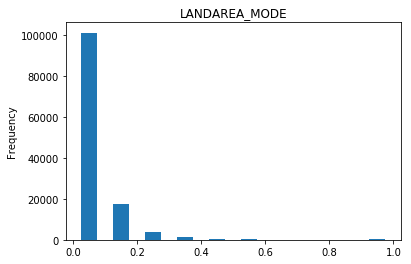

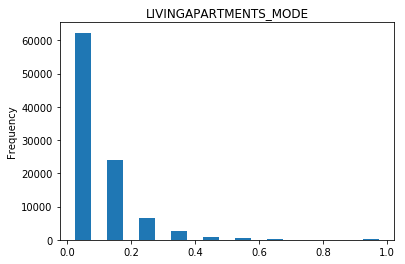

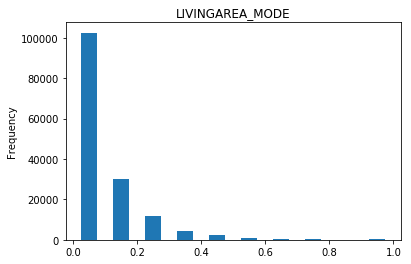

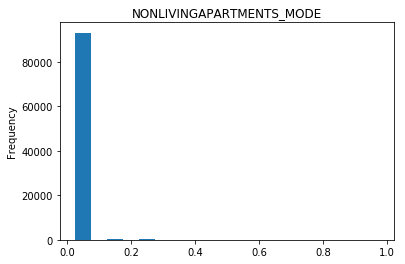

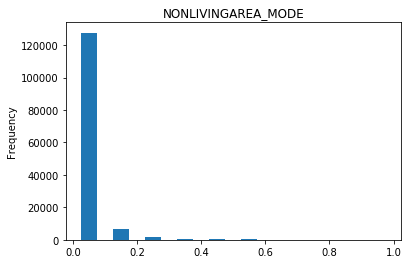

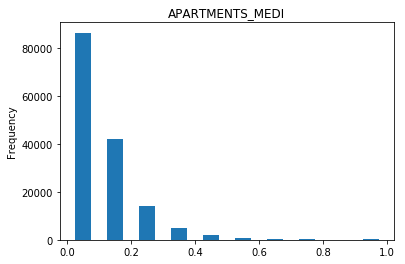

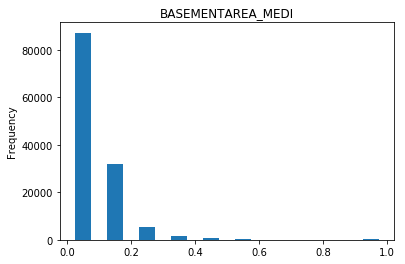

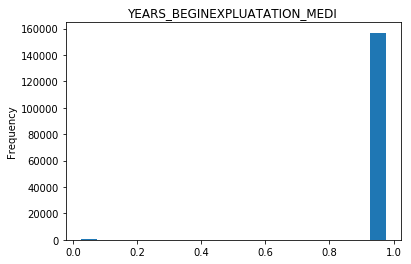

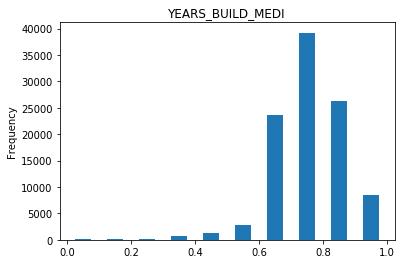

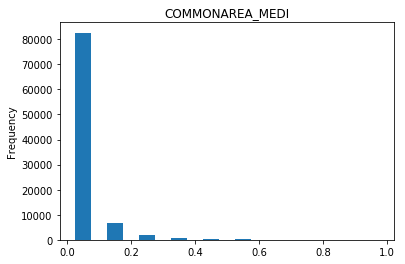

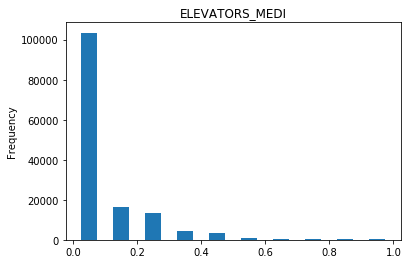

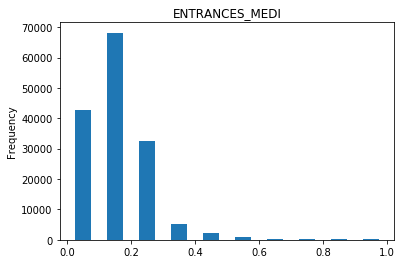

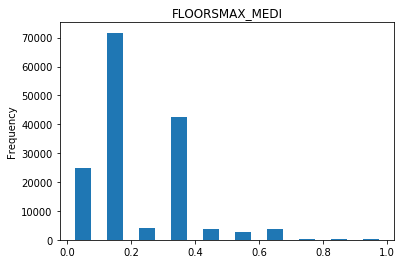

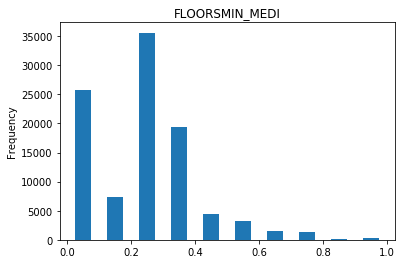

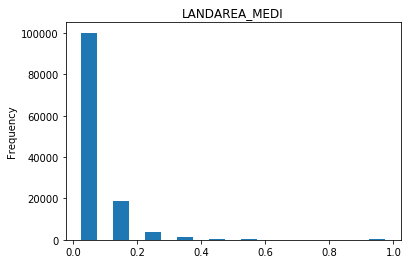

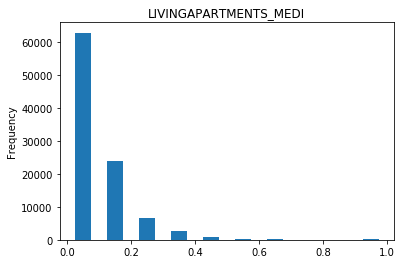

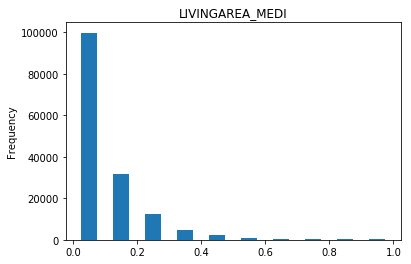

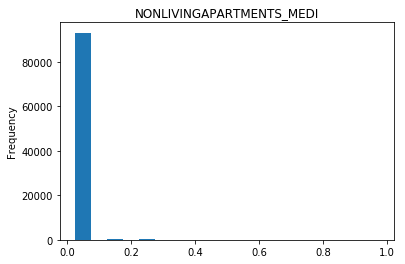

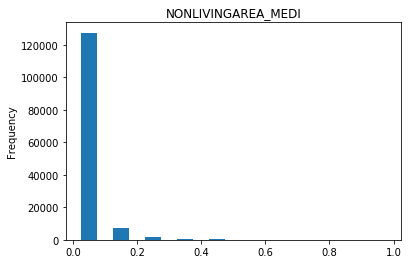

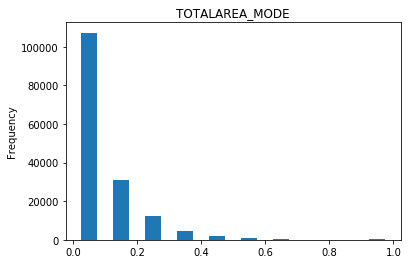

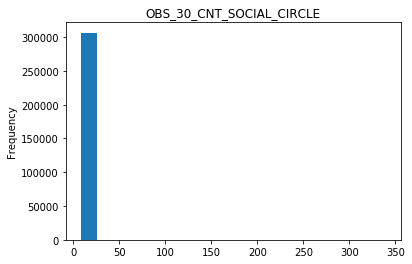

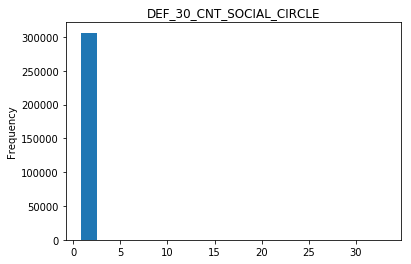

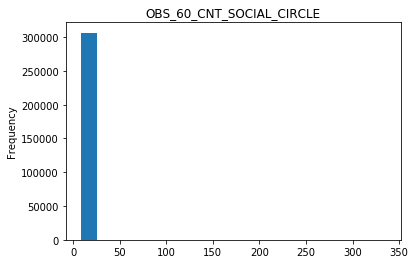

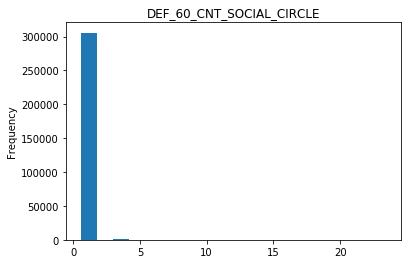

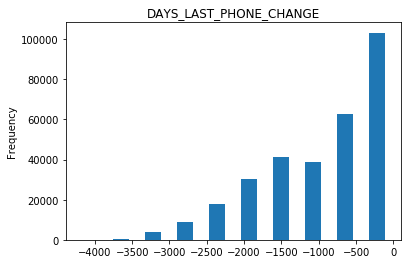

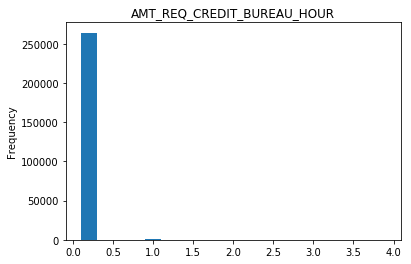

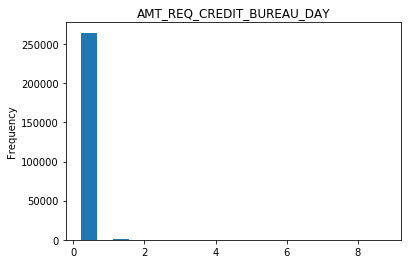

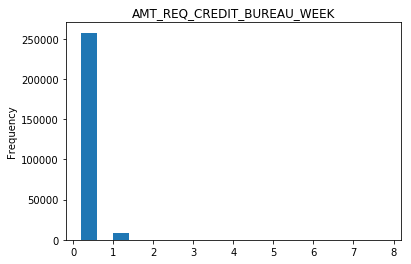

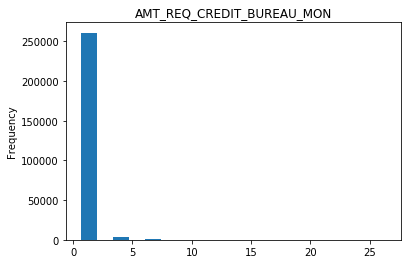

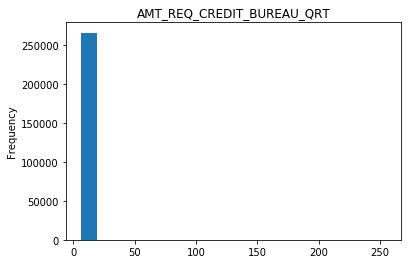

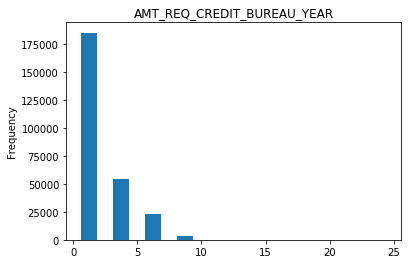

In [4]:
# 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因
# 先篩選數值型的欄位
"""
YOUR CODE HERE, fill correct data types (for example str, float, int, ...)
"""
dtype_select = [amt_income.dtype]

# Filter out the dtype we need
numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))])
numeric_columns

# 再把只有 2 值 (通常是 0,1) 的欄位去掉
numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns",  len(numeric_columns))


# 檢視這些欄位的數值範圍
for col in numeric_columns:
    app_train[col].plot.hist(title = col, rwidth=0.5)
    plt.show()

In [5]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE
cdf = app_train['AMT_INCOME_TOTAL'].sort_values()
cdf


1678          25650.0
20727         25650.0
240137        26100.0
186643        26100.0
246104        26100.0
132707        26460.0
262748        26550.0
175433        26550.0
4735          27000.0
187572        27000.0
292142        27000.0
124146        27000.0
125059        27000.0
10585         27000.0
62585         27000.0
173546        27000.0
83674         27000.0
267037        27000.0
90900         27000.0
277924        27000.0
232535        27000.0
163569        27000.0
133737        27000.0
299307        27000.0
205513        27000.0
162772        27000.0
239654        27000.0
199006        27000.0
36856         27000.0
293194        27000.0
             ...     
29737       2250000.0
74781       2250000.0
71637       2250000.0
81185       2250000.0
55329       2250000.0
10222       2250000.0
278212      2250000.0
206814      2250000.0
201855      2250000.0
145673      2250000.0
298082      2475000.0
258773      2700000.0
107926      2930026.5
101007      3150000.0
248159    

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


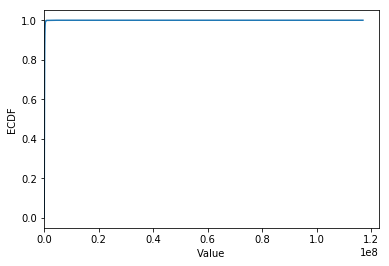

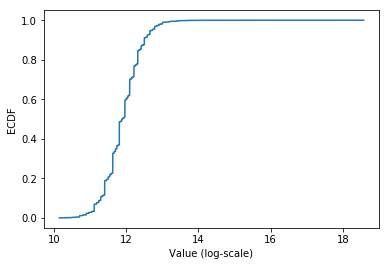

In [17]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
YOUR CODE HERE
"""

#cdf = app_train['AMT_INCOME_TOTAL'].sort_values() #自己寫錯的
#解答給的
cdf = app_train.AMT_INCOME_TOTAL.value_counts().sort_index().cumsum()
#cdf.replace({0: np.nan}, inplace = True)

plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()


count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


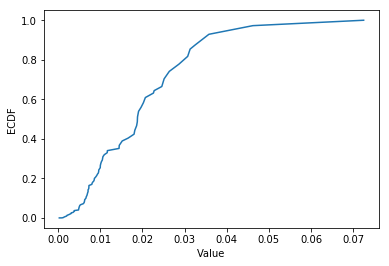

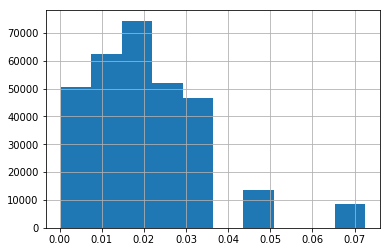

0.035792    16408
0.046220    13442
0.030755    12163
0.025164    11950
0.026392    11601
0.031329    11321
0.028663    11157
0.019101     8694
0.072508     8412
0.020713     8066
0.018850     7668
0.020246     7178
0.018634     7038
0.022625     6943
0.015221     6824
0.032561     6636
0.024610     6404
0.019689     6172
0.018029     6167
0.018801     6108
0.018209     6052
0.014520     4785
0.016612     4408
0.007020     4105
0.022800     3807
0.010032     3570
0.010006     3563
0.014464     3422
0.004960     3300
0.011703     3252
            ...  
0.006008     1796
0.003069     1783
0.008575     1763
0.008474     1740
0.007274     1724
0.007114     1684
0.006305     1672
0.008068     1668
0.008866     1654
0.006671     1653
0.002042     1642
0.003813     1616
0.005084     1482
0.006296     1225
0.005313     1218
0.003818     1212
0.003122     1147
0.006233     1087
0.005002     1068
0.002134     1051
0.004849     1038
0.005144      967
0.002506      944
0.003541      627
0.001276  

In [18]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""

# 自己寫錯的
# cdf = app_train['REGION_POPULATION_RELATIVE'].sort_values()

# 解答給的
cdf = app_train.REGION_POPULATION_RELATIVE.value_counts().sort_index().cumsum()


#cdf.replace({0: np.nan}, inplace = True)


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


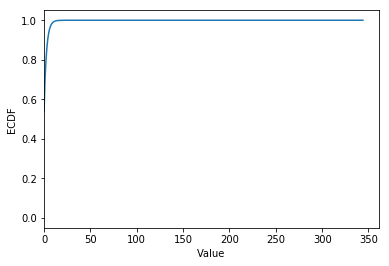

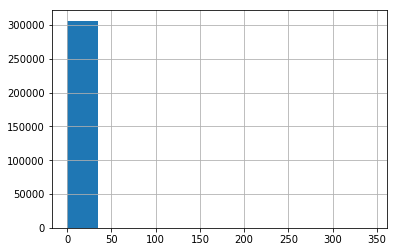

344.0         1
47.0          1
30.0          1
29.0          2
28.0          1
27.0          5
26.0          1
25.0         11
24.0         12
23.0         13
22.0         20
21.0         28
20.0         30
19.0         44
18.0         49
17.0         73
16.0        137
15.0        166
14.0        238
13.0        401
12.0        620
11.0        837
10.0       1335
9.0        1959
8.0        2886
7.0        4344
6.0        6349
5.0        9463
4.0       13946
3.0       20215
2.0       29766
1.0       48870
0.0      164666
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


In [19]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)

# 錯的
# cdf = app_train['OBS_60_CNT_SOCIAL_CIRCLE'].sort_values()

#解答
cdf = app_train.OBS_60_CNT_SOCIAL_CIRCLE.value_counts().sort_index().cumsum()

plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

0.0     164666
1.0      48870
2.0      29766
3.0      20215
4.0      13946
5.0       9463
6.0       6349
7.0       4344
8.0       2886
9.0       1959
10.0      1335
11.0       837
12.0       620
13.0       401
14.0       238
15.0       166
16.0       137
17.0        73
18.0        49
19.0        44
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64


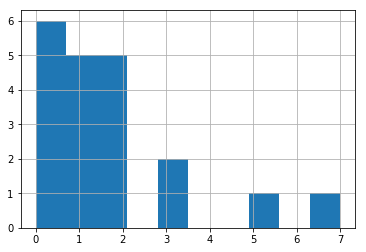

In [20]:
# 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。
# 這時可以考慮用 value_counts 去找到這些數值
# 把一些極端值暫時去掉，在繪製一次 Histogram
# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
"""
Your Code Here
"""
loc_b = 'OBS_60_CNT_SOCIAL_CIRCLE'
loc_a = app_train[app_train[loc_b] < 20.0 ][loc_b].value_counts()

print(loc_a)
app_train.loc[loc_a, loc_b].hist()
plt.show()